In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import get_structural_errors

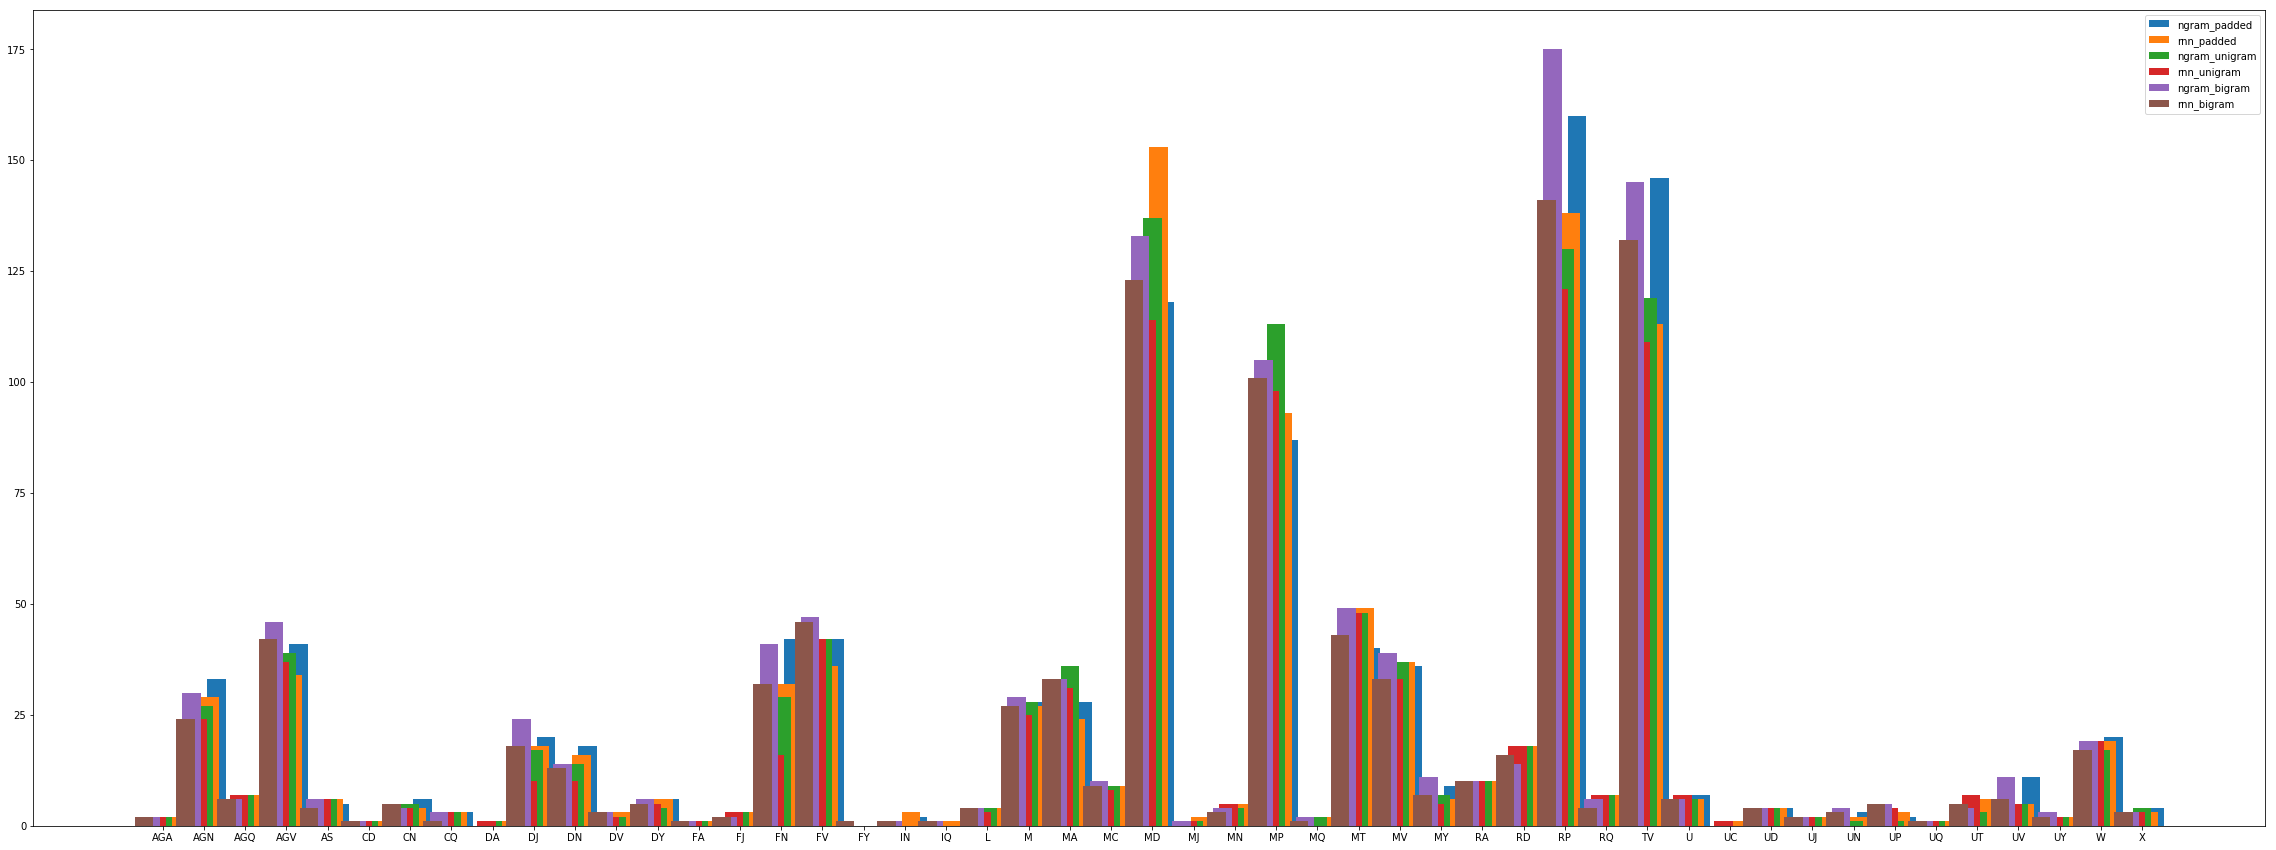

In [2]:
def count_error_types(file, column_name):
    df = pd.read_csv(file)
    df = df[df['Negative transfer?'] == True]
    df = df[df['Negative transfer?'] != df['nlt']]
    df = df[df['error_type'].isin(get_structural_errors())]
    return df.groupby(['error_type']).size().reset_index(name=column_name)

def process_data(files_dict):
    dfs = {}
    for identifier in files_dict:
        dfs[identifier] = count_error_types(files_dict[identifier], identifier)
    df = pd.DataFrame(columns=['error_type'])
    for identifier in dfs:
        df = pd.merge(df, dfs[identifier], on="error_type", how='outer')
        df = df.fillna(0)
        df = df.sort_values(by=['error_type'])
    return df

files_dict = {'ngram_padded': './data/kenlm_5_incorrect_ud_tags_padded.csv',
             'rnn_padded': './data/results_en_ud_zhs_ud_0.0001_16_NLLoss_1_padded.csv',
             'ngram_unigram': './data/kenlm_5_incorrect_ud_tags_unigram.csv',
             'rnn_unigram': './data/results_en_ud_zhs_ud_0.0001_16_NLLoss_1_unigram.csv',
             'ngram_bigram': './data/kenlm_5_incorrect_ud_tags_bigram.csv',
             'rnn_bigram': './data/results_en_ud_zhs_ud_0.0001_16_NLLoss_1_bigram.csv'
             }
df = process_data(files_dict)
plt.rcParams['figure.figsize'] = [40, 15]
labels = list(df.error_type)
x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
counts = {}
for i, identifier in enumerate(files_dict):
    counts[identifier] = list(df[identifier])
    ax.bar(x + ((2-i) * 2 * width/(len(files_dict))), counts[identifier], width, label=identifier)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

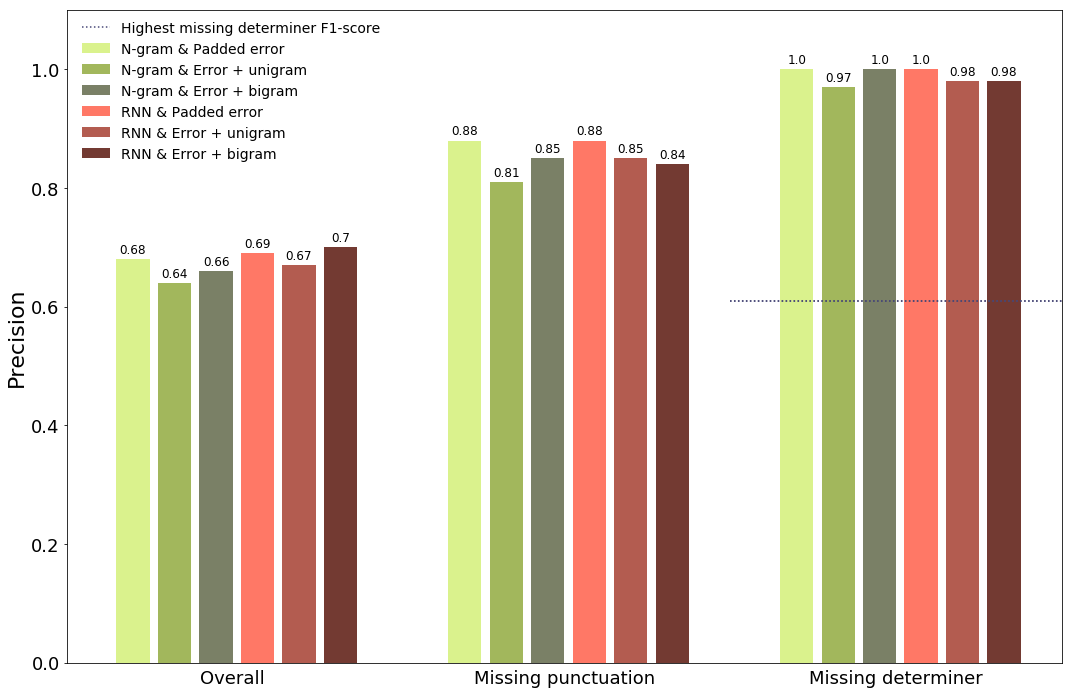

In [9]:
plt.rcParams['figure.figsize'] = [15, 10]
labels = ['Overall', 'Missing punctuation', 'Missing determiner']
n_gram_padded = [0.68, 0.88, 1.0]
n_gram_unigram = [0.64, 0.81, 0.97]
n_gram_bigram = [0.66, 0.85, 1.0]
rnn_padded = [0.69, 0.88, 1.0]
rnn_unigram = [0.67, 0.85, 0.98]
rnn_bigram = [0.7, 0.84, 0.98]

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width, n_gram_padded, width, label='N-gram & Padded error', color='#daf28d')
rects2 = ax.bar(x - 1.75*width, n_gram_unigram, width, label='N-gram & Error + unigram', color='#A2B75C')
rects3 = ax.bar(x - 0.5*width, n_gram_bigram, width, label='N-gram & Error + bigram', color='#7A8066')
rects4 = ax.bar(x + 0.75*width, rnn_padded, width, label='RNN & Padded error', color='#FF7866')
rects5 = ax.bar(x + 2*width, rnn_unigram, width, label='RNN & Error + unigram', color='#B35C50')
rects6 = ax.bar(x + 3.25*width, rnn_bigram, width, label='RNN & Error + bigram', color='#733a32')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision', fontsize=22)
ax.tick_params(labelsize=18)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.xaxis.set_ticks_position('none') 
plt.hlines([0.61, 0.61], 1.5, 2.5, colors='#474776', linestyles='dotted', label='Highest missing determiner F1-score')
plt.gca().set_ylim(0, 1.1)
plt.gca().set_xlim(-0.5, 2.5)
plt.legend(loc=(0.01, 0.76), ncol=1, frameon=False, fontsize=14)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()

plt.savefig('precision3.png', bbox_inches="tight")